# Using Program R For Spatial Models
## Get setup
1.	Install anaconda
 -  https://docs.continuum.io/anaconda/install/windows/
2.	Install anaconda navigator
 -  https://anaconda.org/anaconda/anaconda-navigator
3.	Set up r environment
 -  https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/
4.	Add CRAN channel
 -  For packages that are hosted only on CRAN
 -  Click on your new environment, click channels button, click add, type cran, enter
 - Click update index
5.	Install packages


In [1]:
require(sf)
require(rgdal)
require(raster)
require(Metrics)
require(ROCR)
require(spatialEco)
require(tidyverse)
require(randomForest)
require(rfUtilities)

Loading required package: sf

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1

Loading required package: rgdal

Loading required package: sp

rgdal: version: 1.5-18, (SVN revision 1082)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: C:/Users/ncase2/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: C:/Users/ncase2/Documents/R/win-library/4.0/rgdal/proj
Linking to sp version:1.4-4
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.

Loading required package: raster

Loading required package: Metrics

Warning message:
"package 'Metrics' was built under R version 4.0.5"
Loading required package: ROCR

Warning message:
"package 'ROCR' was built under R version 4.0.5"
Loading re

# Get data

In [2]:
cactus<- st_read(dsn = ".", layer = "Cactus")
strm<- st_read(dsn = ".", layer = "NHD_Streams") %>% 
  st_zm()
stdy<- st_read(dsn = ".", layer = "StudyArea")

Reading layer `Cactus' from data source `C:\Users\ncase2\Documents\GIST5220\Final\notebooks' using driver `ESRI Shapefile'
Simple feature collection with 200 features and 2 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 584124 ymin: 4434470 xmax: 604740.8 ymax: 4440739
projected CRS:  NAD83 / UTM zone 12N
Reading layer `NHD_Streams' from data source `C:\Users\ncase2\Documents\GIST5220\Final\notebooks' using driver `ESRI Shapefile'
Simple feature collection with 289 features and 3 fields
geometry type:  MULTILINESTRING
dimension:      XYZM
bbox:           xmin: 515980.9 ymin: 4351157 xmax: 682617.4 ymax: 4510146
z_range:        zmin: 0 zmax: 0
m_range:        mmin: 0 mmax: 61289.04
projected CRS:  NAD83 / UTM zone 12N
Reading layer `StudyArea' from data source `C:\Users\ncase2\Documents\GIST5220\Final\notebooks' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 571861

# Plot it

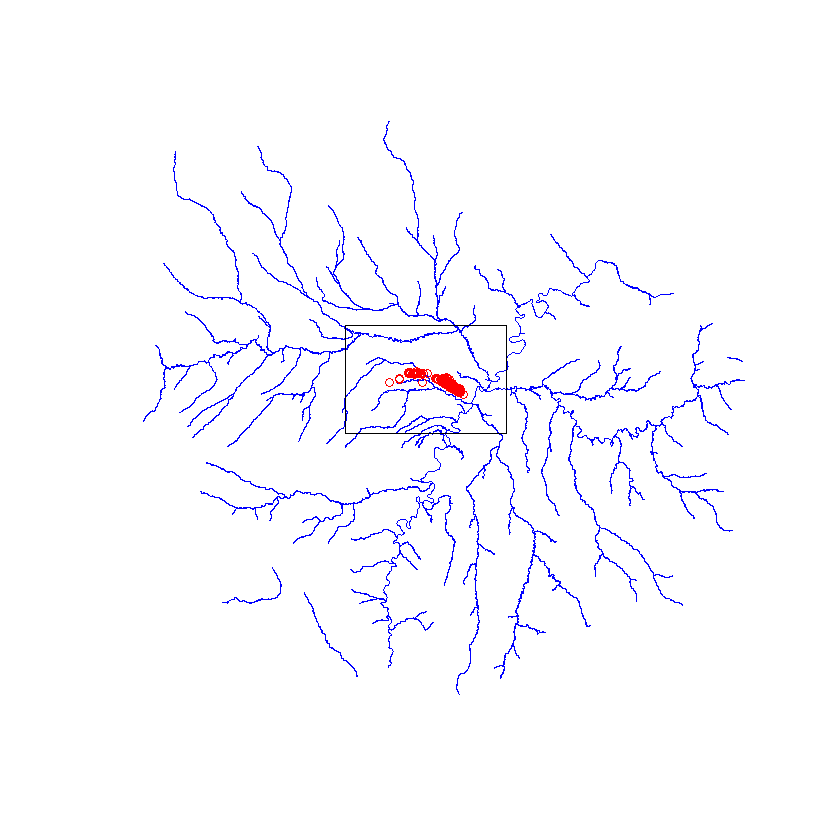

In [3]:
plot(strm$geometry, col = "blue")
plot(stdy$geometry, add = TRUE)
plot(cactus$geometry, add = TRUE, col="red")

# View attributes

In [4]:
head(cactus)
head(strm)
head(stdy)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

PointID Present geometry                
1 26883   1       POINT (599206.7 4437880)
2 24474   1       POINT (600704.5 4436691)
3 17436   1       POINT (593538.6 4440215)
4 25486   1       POINT (597417.6 4438756)
5 18909   1       POINT (602028.3 4436259)
6 19144   1       POINT (603197.3 4436172)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

OBJECTID ComID Shape_Leng geometry                      
1 798      799   27917.097  MULTILINESTRING ((642232.1 ...
2 799      800    3593.890  MULTILINESTRING ((656247.1 ...
3 800      801    7704.563  MULTILINESTRING ((656247.1 ...
4 801      802    6113.479  MULTILINESTRING ((638974.9 ...
5 802      803   12046.918  MULTILINESTRING ((638974.9 ...
6 804      805   11889.963  MULTILINESTRING ((633349.7 ...

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

Id geometry                      
1 0  POLYGON ((571861.1 4423554,...

# View spatial info and make into dataframe

In [5]:
str(stdy)
strm[5,]

Classes 'sf' and 'data.frame':	1 obs. of  2 variables:
 $ Id      : int 0
 $ geometry:sfc_POLYGON of length 1; first list element: List of 1
  ..$ : num [1:5, 1:2] 571861 571861 616742 616742 571861 ...
  ..- attr(*, "class")= chr [1:3] "XY" "POLYGON" "sfg"
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA
  ..- attr(*, "names")= chr "Id"


ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

OBJECTID ComID Shape_Leng geometry                      
5 802      803   12046.92   MULTILINESTRING ((638974.9 ...

# Intersect streams with study area

## and regenerate shape length

In [6]:
istrm<- st_intersection(strm, stdy) %>% 
  mutate(Shape_Leng = st_length(geometry))



Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


# Check results

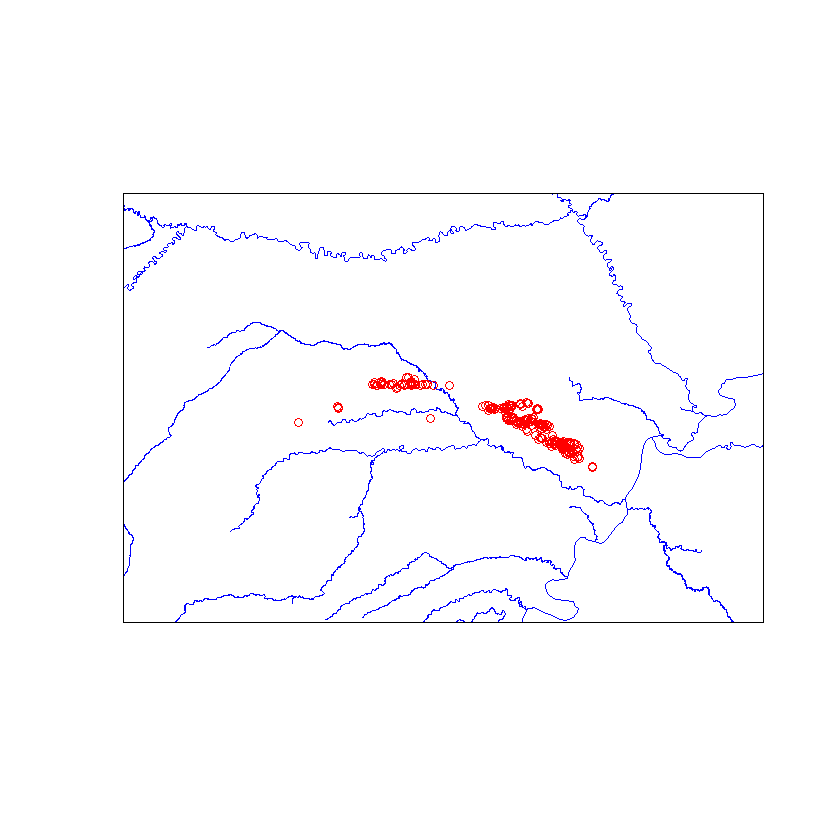

In [7]:
plot(istrm$geometry, col="blue")
plot(stdy$geometry, add=TRUE)
plot(cactus$geometry, add=TRUE, col="red")


# Dissolve streams into one feature

In [8]:
istrm<- st_union(istrm)

# Buffer cacti and add back to original info

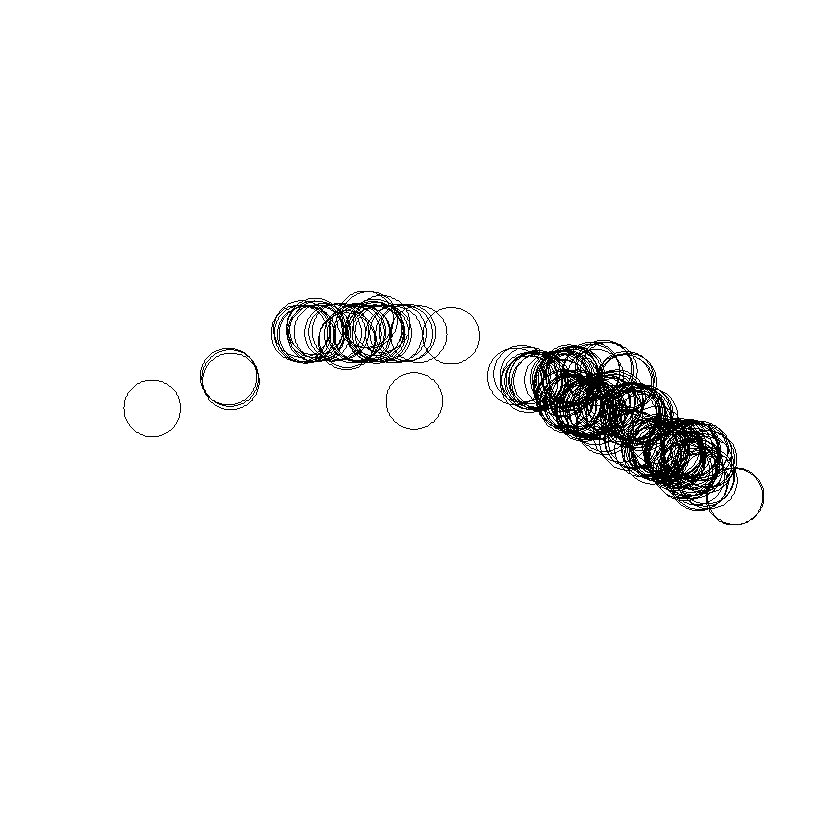

In [9]:
pbuff<- st_buffer(cactus, dist = 1000) 

plot(pbuff$geometry)

# Dissolve subtract and color cactus not next to stream

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


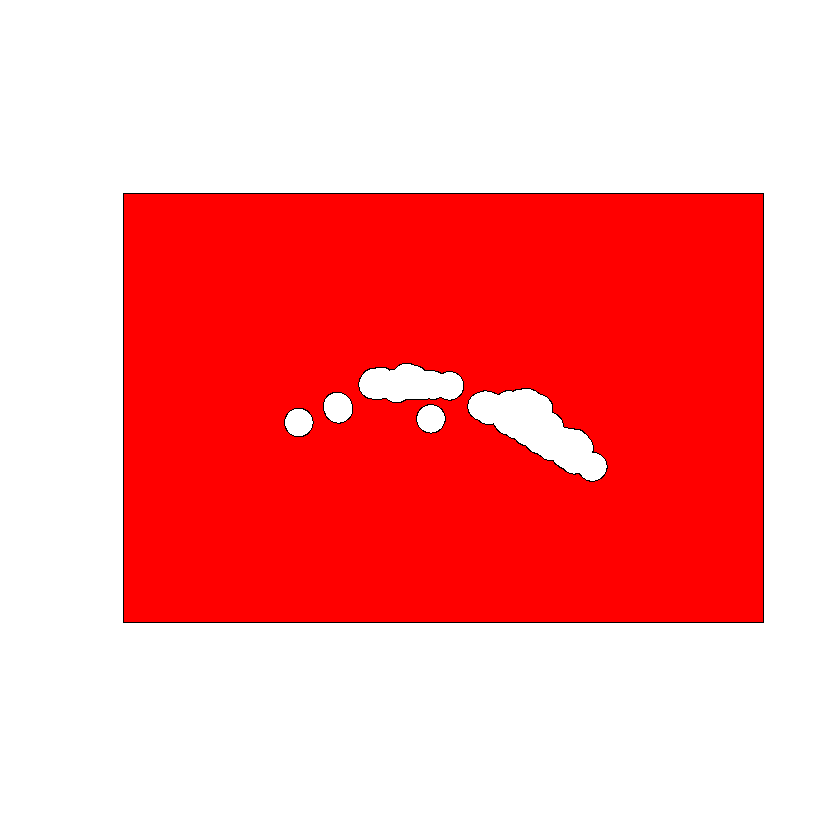

In [10]:
pdis<- st_union(pbuff) #dissolve the buffered points first; rgeos
pdiff<- st_difference(stdy, pdis) #get the geomtric difference; rgeos
plot(pdiff$geometry, col="red")


# Expand study area to reduce edge effect of zonal stats

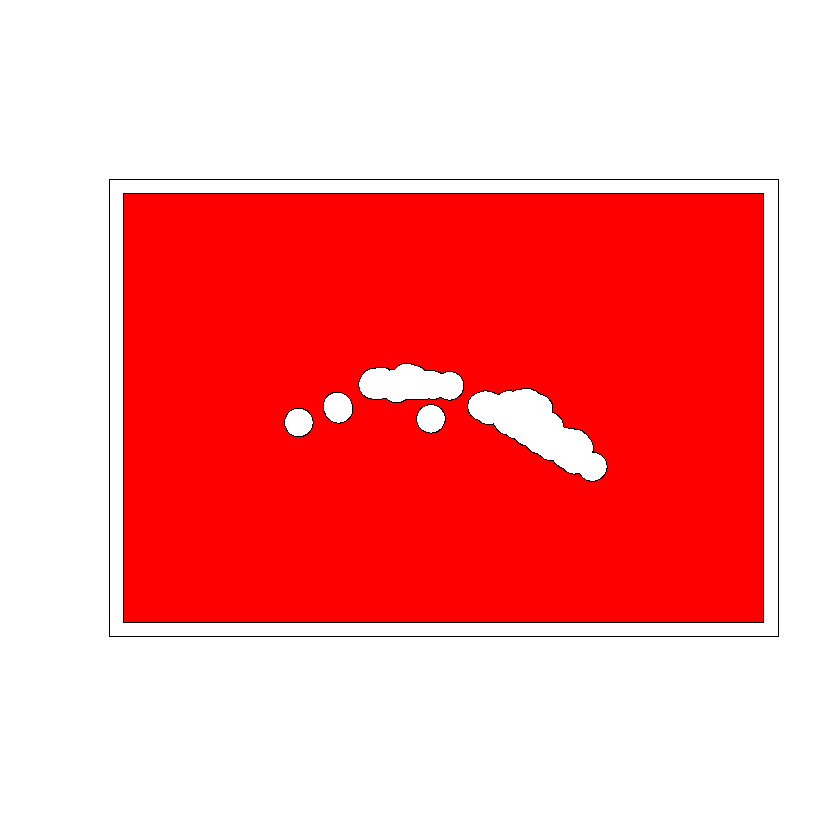

In [11]:
rstdy<- stdy %>% 
  st_buffer(dist = 1000) %>% 
  st_bbox() %>% 
  st_as_sfc()
plot(pdiff$geometry, col="red")
plot(rstdy, add = TRUE)



# Create random points and add to dataframe

In [12]:
rp<- st_sample(stdy, size = nrow(cactus)*2, type = "random") %>% 
  st_as_sf(data.frame(PointID = 1:nrow(cactus)*2, Present = 0)) %>% 
  rename(geometry = x)


# Get attribute data from study area

In [13]:
cactus<- rbind(cactus, rp)

# Append points to cactus layer

In [14]:
cactus<- rbind(cactus, rp)

## And check results


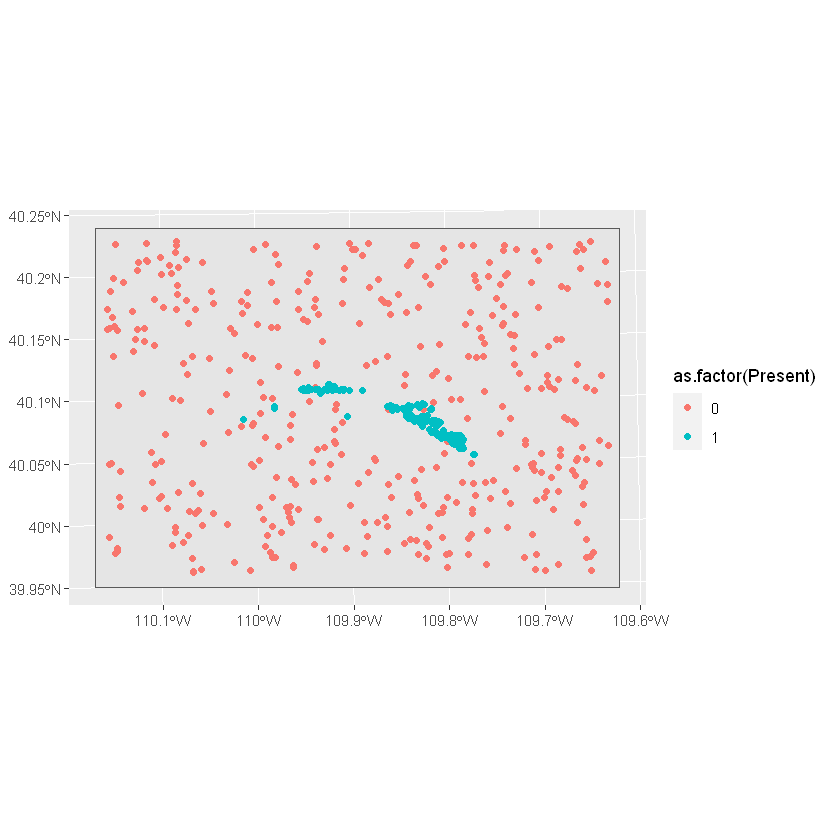

In [15]:
st_geometry(cactus) <- "geometry"
ggplot() + 
  geom_sf(data = rstdy) + 
  geom_sf(data = cactus, aes(group=as.factor(Present), color = as.factor(Present)))


# Analyze

## Read in DEM for spatial analyses

In [16]:
dem<- raster("DEM_30m.img")

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
"Discarded datum Unknown based on GRS80 ellipsoid in CRS definition"


## Plot

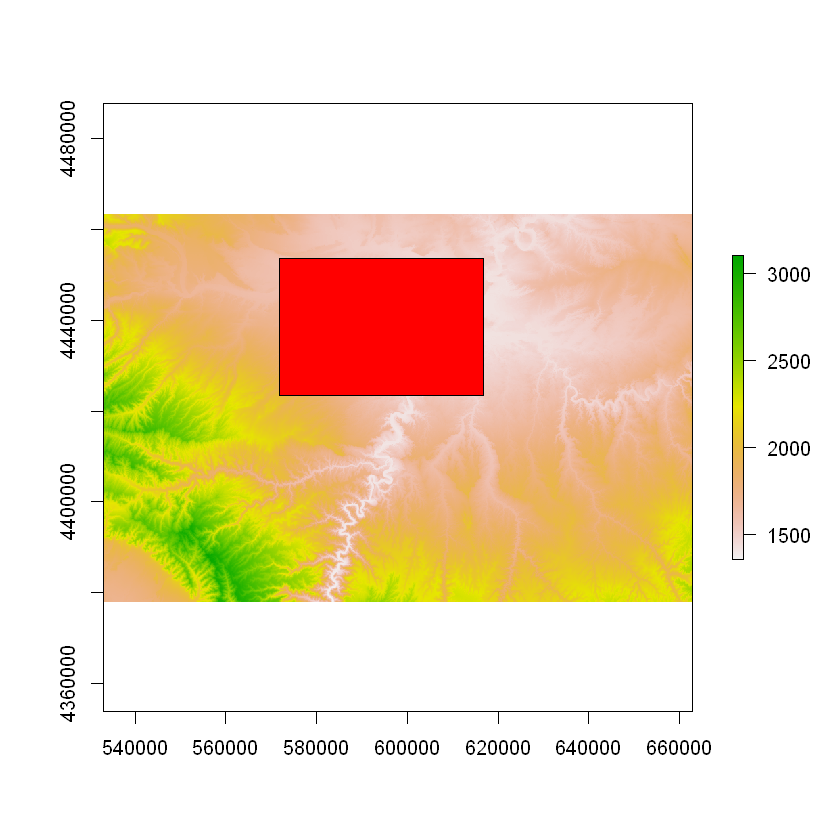

In [17]:
plot(dem)
plot(stdy, add=TRUE, col="red")

## Crop to study area

In [18]:
cdem<- crop(dem, as(rstdy,"Spatial"))

## Plot with cacti and random points from above

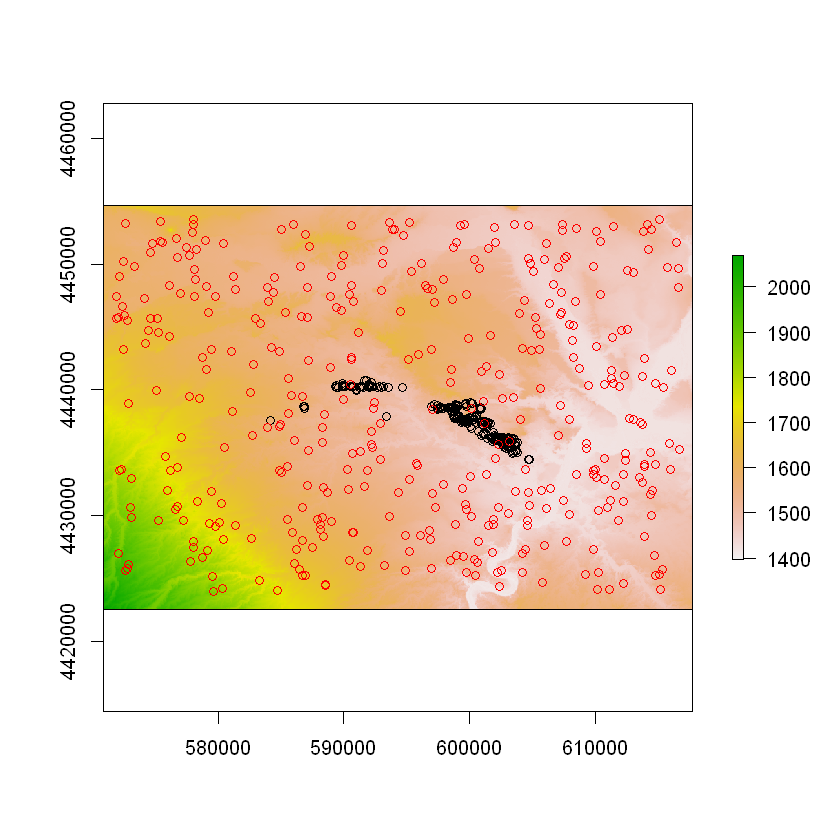

In [19]:
plot(cdem)
plot(rstdy, add=TRUE)
plot(cactus$geometry, add=TRUE, col=ifelse(cactus$Present==1, "black", "red"))

## Get the slope and Aspect and combine with DEM

In [20]:
slp<- terrain(cdem, opt = "slope", unit = "degrees", progress = "text")
asp<- terrain(cdem, opt = "aspect", unit = "degrees", progress = "text")

## Do more geomorphometrics

### Heat Load Index

Calculates the McCune & Keon (2002) Heat Load Index



In [21]:
hli<- hli(cdem, force.hemisphere = "northern")

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
"Discarded datum Unknown based on GRS80 ellipsoid in CRS definition"
Using folded aspect equation for Northern hemisphere



### Topographic Position Index (tpi)
Calculates topographic position using mean deviations



In [22]:
tpi3<- tpi(cdem, scale = 3, win = "rectangle")

Same as a ten by ten rectangular window but leaving off the corners and takes

In [23]:
tpi300<- tpi(cdem, scale = 300, win = "circle")

### Solar-radiation Aspect Index
Calculates the Roberts and Cooper (1989) Solar-radiation Aspect Index

In [24]:
trasp<- trasp(cdem)

## Add the results to a raster stack and rename

In [25]:
rs<- stack(cdem, slp, hli, tpi3, tpi300, trasp)
names(rs)<- c("DEM_30m", "Slope", "HLI", "TPI3", "TPI300", "TRASP")

## Extract info and bind input cacti

In [26]:
e<- data.frame(raster::extract(rs, as(cactus,"Spatial")))
cactus<- cactus %>% 
  bind_cols(e)

## View relationship between slope and elevation

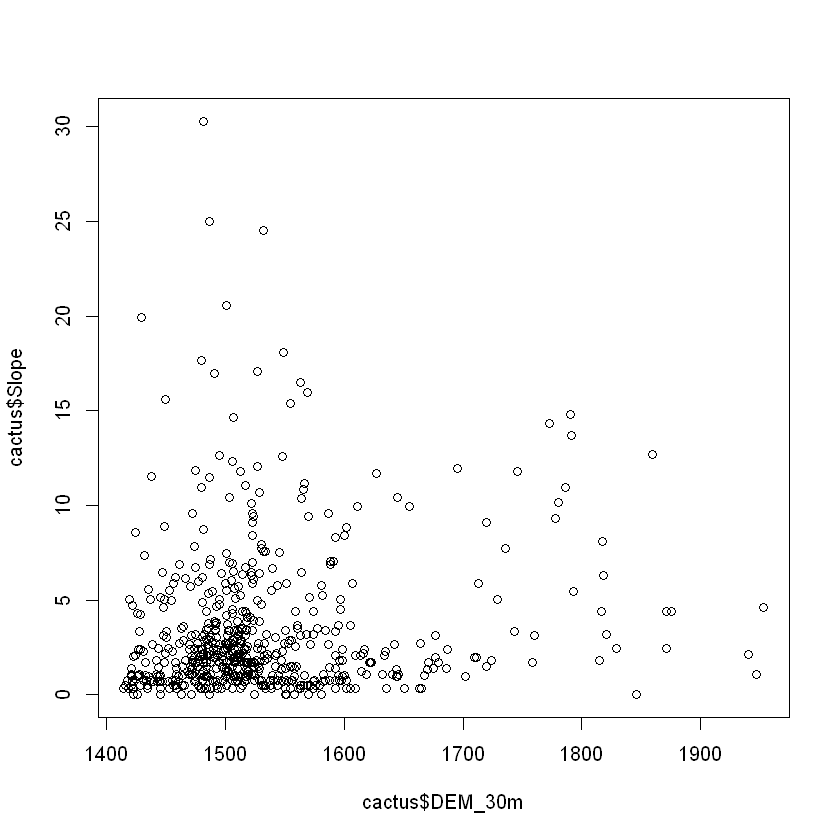

In [27]:
plot(cactus$DEM_30m, cactus$Slope)

## Inspect data checking for nulls or weird values

In [28]:
summary(cactus)

    PointID         Present       DEM_30m         Slope        
 Min.   :    2   Min.   :0.0   Min.   :1415   Min.   : 0.0000  
 1st Qu.:  126   1st Qu.:0.0   1st Qu.:1478   1st Qu.: 0.9548  
 Median :  251   Median :0.0   Median :1516   Median : 1.9679  
 Mean   : 4437   Mean   :0.2   Mean   :1536   Mean   : 3.3490  
 3rd Qu.:  376   3rd Qu.:0.0   3rd Qu.:1569   3rd Qu.: 3.8437  
 Max.   :27899   Max.   :1.0   Max.   :1953   Max.   :30.2984  
      HLI              TPI3              TPI300          TRASP          
 Min.   :0.4828   Min.   :-5.00000   Min.   :393.8   Min.   :6.780e-06  
 1st Qu.:0.6984   1st Qu.:-0.44444   1st Qu.:413.6   1st Qu.:5.122e-02  
 Median :0.7115   Median : 0.00000   Median :425.8   Median :5.867e-02  
 Mean   :0.7146   Mean   : 0.04467   Mean   :431.6   Mean   :5.426e-02  
 3rd Qu.:0.7288   3rd Qu.: 0.44444   3rd Qu.:441.5   3rd Qu.:6.290e-02  
 Max.   :0.8912   Max.   : 9.44444   Max.   :549.3   Max.   :6.700e-02  
          geometry   
 POINT        :1000

# Logistic Regression

## Identify for colinearity between parameters
* Absolute value of .7 means params cant be in the same model, too colinear
* test for model assumptions

In [29]:
cor(cactus[,3:7] %>% 
      st_drop_geometry(), use = "complete.obs")

DEM_30m     Slope      HLI        TPI3       TPI300    
DEM_30m  1.00000000 0.12587157 -0.1418776 0.07979374  0.9901448
Slope    0.12587157 1.00000000  0.1389347 0.04260849  0.1371138
HLI     -0.14187760 0.13893474  1.0000000 0.02578550 -0.1347701
TPI3     0.07979374 0.04260849  0.0257855 1.00000000  0.1556168
TPI300   0.99014475 0.13711376 -0.1347701 0.15561682  1.0000000

* TPI300 and DEM are too highly correlated. Drop TPI 300


## Model Formula 

### Fitting Generalized Linear Models
glm is used to fit generalized linear models, specified by giving a symbolic description of the linear predictor and a description of the error distribution.



In [30]:
modLR <- glm(Present~DEM_30m + Slope + HLI + TRASP, data=cactus %>% 
               st_drop_geometry(), family=binomial(link="logit"))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


### Get the coefficients

* error around estimate crosses zero because p > .05
* more parsimonious = less complex = better 
* use AIC to determine, lower is better

In [31]:
summary(modLR)


Call:
glm(formula = Present ~ DEM_30m + Slope + HLI + TRASP, family = binomial(link = "logit"), 
    data = cactus %>% st_drop_geometry())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3254  -0.7176  -0.5106  -0.1890   2.2663  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.726e+01  9.951e+00   5.754 8.70e-09 ***
DEM_30m     -7.697e-03  1.345e-03  -5.725 1.03e-08 ***
Slope       -2.711e+00  5.473e-01  -4.954 7.28e-07 ***
HLI          3.755e+00  2.579e+00   1.456    0.145    
TRASP       -7.537e+02  1.461e+02  -5.157 2.51e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1000.80  on 999  degrees of freedom
Residual deviance:  900.62  on 995  degrees of freedom
AIC: 910.62

Number of Fisher Scoring iterations: 7


* increasing in elevation, less cactus
* increasing slope, less cactus

## Calculate the Area Under Curve (AUC)
### Area under the ROC curve (AUC)
auc computes the area under the receiver-operator characteristic curve (AUC).

In [32]:
( lrAUC<- auc(cactus$Present, modLR$fitted.values) )

[1] 0.7268562

* .7 generally threshold, .9 target, 1 ideally.

## Calculate the receiver operator characteristic (ROC) curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

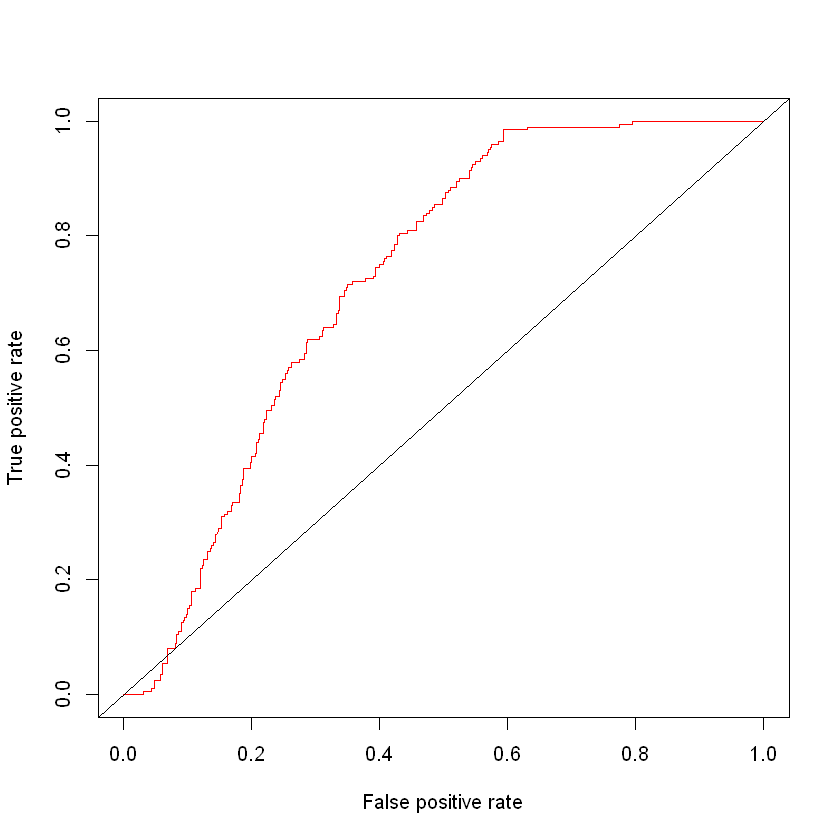

In [33]:
pred <- prediction(fitted(modLR), cactus$Present)
perf <- performance(pred, measure="tpr", x.measure="fpr")
plot(perf, col=rainbow(10))
abline(coef=c(0,1))

## Predict back to the landscape

  |======================================================================| 100%



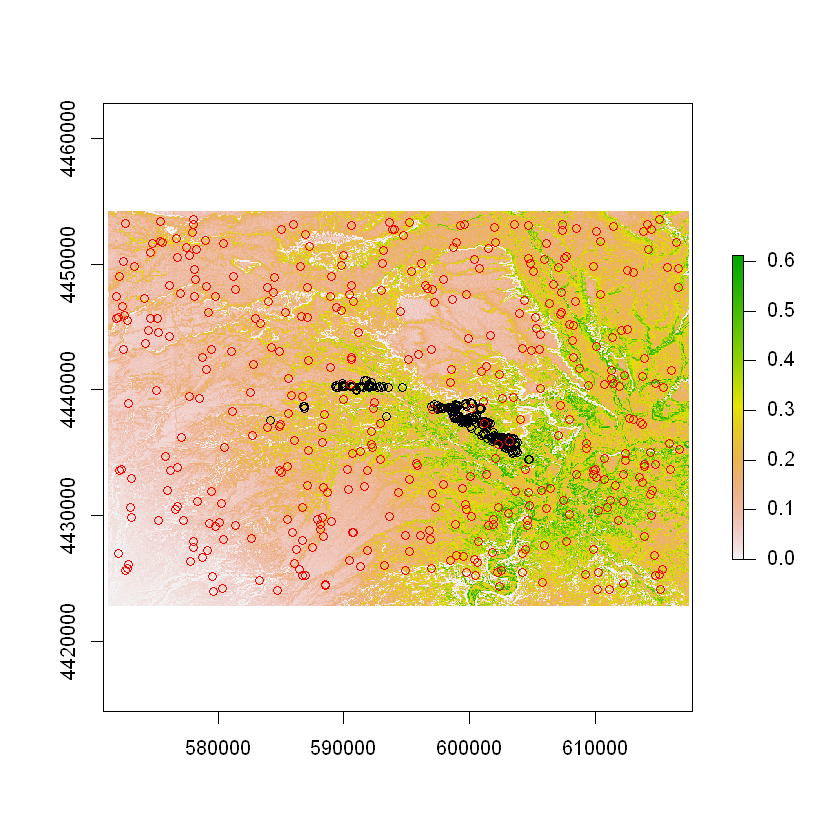

In [34]:
pred<- predict(rs, modLR, type='response', progress="text")
plot(pred)
plot(cactus$geometry, add=TRUE, col=ifelse(cactus$Present==1, "black", "red"))

# Choose a threshold: good for cacti or not
* good probabilities for where cactus are found
## Create data frame of inputs vs fitted values

In [35]:
foundCactus<-data.frame(obs = cactus$Present, fitted = modLR$fitted.values) %>% 
  group_by(obs) %>% 
  summarise(Min = min(fitted), 
            Max = max(fitted))
foundCactus

`summarise()` ungrouping output (override with `.groups` argument)



obs Min          Max      
1 0   2.220446e-16 0.5845156
2 1   7.668370e-02 0.4851960

* .3 selected as threshold

In [36]:
rcls<-data.frame(from = c(0, .3), to = c(.3, 1), becomes = c(0, 1))

predClass<- reclassify(pred, rcl = as.matrix(rcls))
freq(predClass)

value count  
[1,]  0    1367187
[2,]  1     252963
[3,] NA      52260

# Areas that might want to be protected according to our model and threshold.

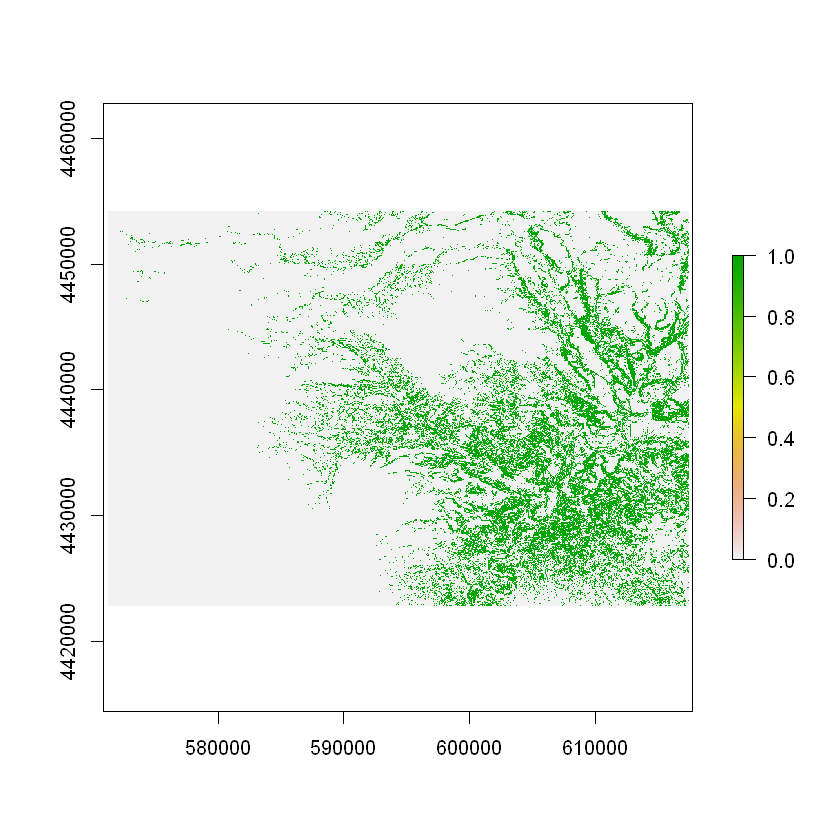

In [37]:
plot(predClass)

# Random Forest
## Check for multi-collinearity
* None is desirable
* Else take out the params that the return and remove one and test again

In [38]:
mCol<- multi.collinear(cactus %>% 
                         st_drop_geometry() %>% 
                         dplyr::select(DEM_30m:TRASP))

## Select the coefficients
* Use `selvars` as output

In [39]:
rf.modelSel(xdata = cactus %>% 
              st_drop_geometry() %>% 
              dplyr::select(DEM_30m:TRASP), 
            ydata = as.factor(cactus$Present))

Selected variables: 
	 DEM_30m Slope HLI TPI3 TPI300 TRASP 

Variables in parameter set 1 
	 DEM_30m Slope HLI TPI3 TPI300 TRASP 

Variables in parameter set 2 
	 DEM_30m Slope TPI300 TRASP 

Variables in parameter set 3 
	 DEM_30m TPI300 TRASP 

Variables in parameter set 4 
	 DEM_30m TPI300 

Variable importance for selected parameters: 

              imp
DEM_30m 1.0000000
Slope   0.3908493
HLI     0.3257249
TPI3    0.2386758
TPI300  0.8178569
TRASP   0.4043905

Variable importance test for selected parameters: 

  THRESHOLD OOBERROR CLASS.ERROR NPARAMETERS      x1     x2    x3    x4   x5
1 0.0000000      6.6    32.00000           6 DEM_30m TPI300 TRASP Slope  HLI
3 0.3976199      6.9    33.66929           3 DEM_30m TPI300 TRASP  <NA> <NA>
2 0.3420060      7.3    36.00817           4 DEM_30m TPI300 TRASP Slope <NA>
4 0.7144903      9.1    42.64233           2 DEM_30m TPI300  <NA>  <NA> <NA>
    x6
1 TPI3
3 <NA>
2 <NA>
4 <NA>

## Model formula
### Classification and Regression with Random Forest
randomForest implements Breiman's random forest algorithm (based on Breiman and Cutler's original Fortran code) for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.

In [40]:
modRf<- randomForest(x = cactus %>% 
                       st_drop_geometry() %>% 
                       dplyr::select(DEM_30m:TRASP), 
                     y = as.factor(cactus$Present), 
                     ntree = 501, 
                     importance = TRUE)

### Internal Predicted Response

In [41]:
pred2<- predict(modRf, cactus %>% 
                  st_drop_geometry() %>% 
                  dplyr::select(DEM_30m:TRASP), type ="response")
head(pred2)

1 2 3 4 5 6 
1 1 1 1 1 1 
Levels: 0 1

### Internal Predicted Probabilities

In [42]:
obsProb<- as.data.frame(predict(modRf, cactus %>% 
                    st_drop_geometry() %>% 
                    dplyr::select(DEM_30m:TRASP), type = "prob"))
head(obsProb)

0          1        
1 0.08982036 0.9101796
2 0.24750499 0.7524950
3 0.05988024 0.9401198
4 0.08582834 0.9141717
5 0.18962076 0.8103792
6 0.07584830 0.9241517

### Make a data frame with prediction and probability results

In [43]:
mObsPred<- data.frame(Observed = as.numeric(as.character(cactus$Present)),
                            PRED = as.numeric(as.character(pred2)),
                            Prob1 = obsProb[,2],
                            Prob0 = obsProb[,1])
head(mObsPred)

Observed PRED Prob1     Prob0     
1 1        1    0.9101796 0.08982036
2 1        1    0.7524950 0.24750499
3 1        1    0.9401198 0.05988024
4 1        1    0.9141717 0.08582834
5 1        1    0.8103792 0.18962076
6 1        1    0.9241517 0.07584830

### Count the correct predictions and make the validation rate

In [44]:
mop<-(mObsPred$Observed == mObsPred$PRED)
mpcc<- (length(mop[mop=="TRUE"])/length(mop))*100
mpcc

[1] 99.9

### Internal AUC

In [45]:
intAUC<- auc(cactus$Present, obsProb[,2])
head(intAUC)

[1] 0.9999938

### Get the ROC Curve Plot

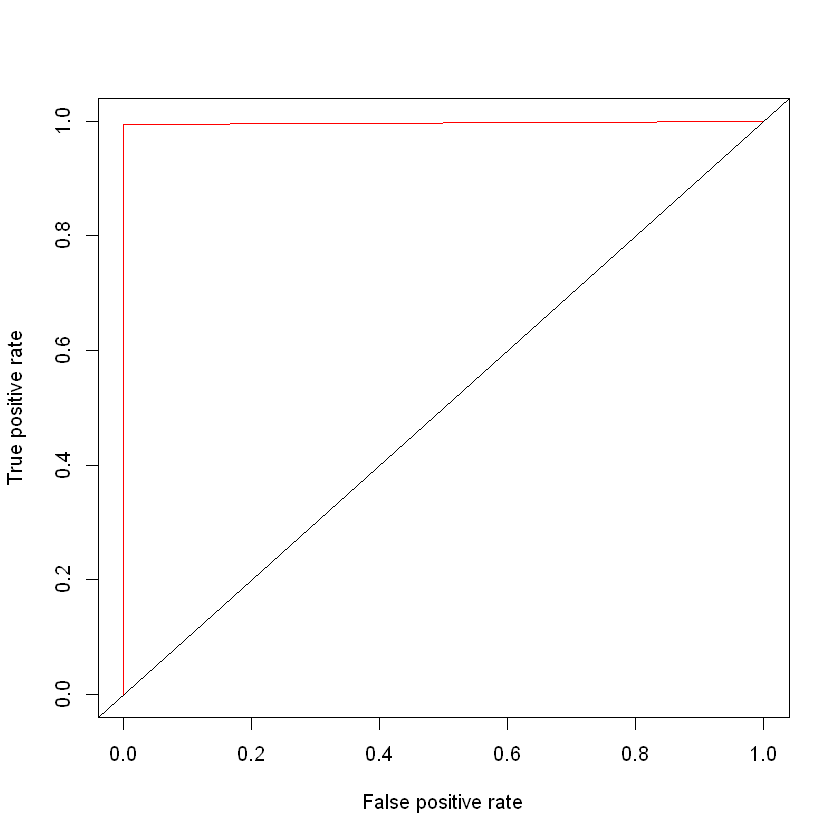

In [46]:
prdctnRf <- prediction(mObsPred$PRED, mObsPred$Observed)
perfRf <- performance(prdctnRf, measure="tpr", x.measure="fpr")
plot(perfRf, col=rainbow(10))
abline(coef=c(0,1))

## Predict back to landscape

  |======================================================================| 100%



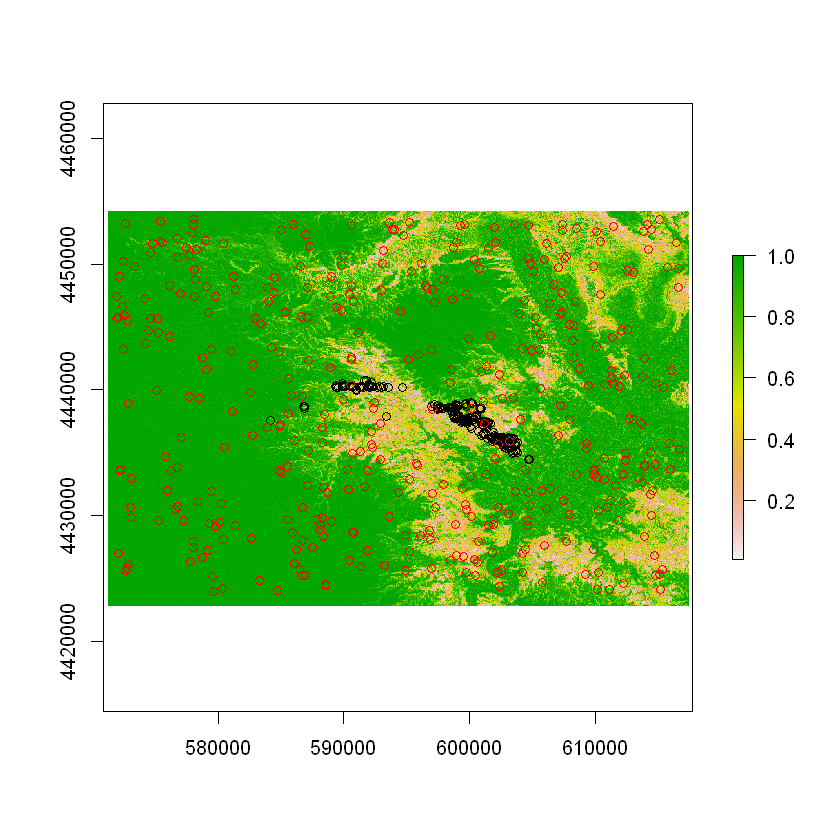

In [47]:
predRf<- predict(rs, modRf, type='prob', progress="text")
plot(predRf)
plot(cactus$geometry, add=TRUE, col=ifelse(cactus$Present==1, "black", "red"))

## Create data frame of inputs vs fitted values

In [48]:
foundCactus<-data.frame(obs = cactus$Present, fitted = mObsPred$Prob1) %>% 
  group_by(obs) %>% 
  summarise(Min = min(fitted), 
            Max = max(fitted))
foundCactus

`summarise()` ungrouping output (override with `.groups` argument)



obs Min      Max     
1 0   0.000000 0.249501
2 1   0.249501 0.992016

* .41 selecting as threshold

In [49]:
rclsRf<-data.frame(from = c(0, .41), to = c(.41, 1), becomes = c(0, 1))

predClassRf<- reclassify(pred, rcl = as.matrix(rcls))
freq(predClassRf)

value count  
[1,]  0    1367187
[2,]  1     252963
[3,] NA      52260

# Areas that might want to be protected according to our model and threshold.

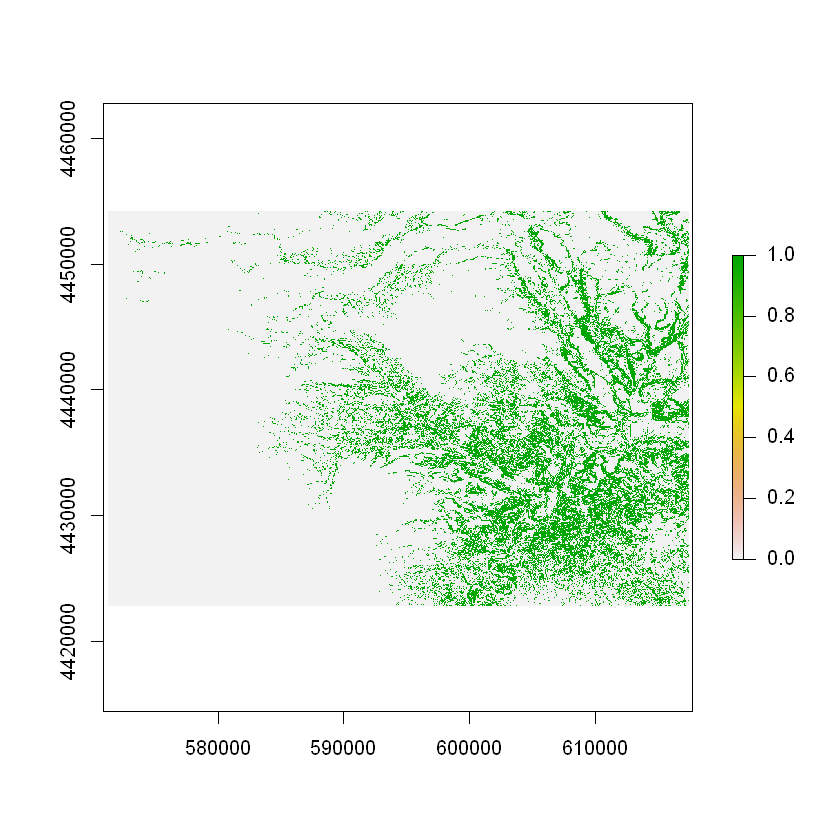

In [50]:
plot(predClassRf)